In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set a style for all plots
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv('../data/raw/survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
# Check shape of the dataframe
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 1259 rows and 27 columns.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [7]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [8]:
# Clean the 'Age' Column
## # First, let's see the problematic rows
print("Rows with invalid 'Age':")
print(df[(df['Age'] < 18) | (df['Age'] > 75)])



Rows with invalid 'Age':
                Timestamp          Age              Gender         Country  \
143   2014-08-27 12:39:14          -29                Male   United States   
364   2014-08-27 15:05:21          329                Male   United States   
390   2014-08-27 15:24:47  99999999999                 All        Zimbabwe   
715   2014-08-28 10:07:53        -1726                male  United Kingdom   
734   2014-08-28 10:35:55            5                Male   United States   
989   2014-08-29 09:10:58            8  A little about you    Bahamas, The   
1090  2014-08-29 17:26:15           11                male   United States   
1127  2014-08-30 20:55:11           -1                   p   United States   

     state self_employed family_history treatment work_interfere  \
143     MN            No             No        No            NaN   
364     OH            No             No       Yes          Often   
390    NaN           Yes            Yes       Yes          Often   


In [9]:
# Now, let's calculate the median of the valid age range
valid_age_median = df[(df['Age'] >= 18) & (df['Age'] <= 75)]['Age'].median()
print(f"\nMedian of valid ages: {valid_age_median}")

# Replace the invalid ages with the median
df.loc[(df['Age'] < 18) | (df['Age'] > 75), 'Age'] = valid_age_median

# Verify the changes by running describe() again
print("\n'Age' column after cleaning:")
print(df['Age'].describe())


Median of valid ages: 31.0

'Age' column after cleaning:
count    1259.000000
mean       32.069897
std         7.265565
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


In [10]:
# Drop columns that are not useful for the model
df.drop(['Timestamp', 'comments', 'state'], axis=1, inplace=True)

print("\nColumns dropped. New shape of the dataframe:", df.shape)


Columns dropped. New shape of the dataframe: (1259, 24)


In [11]:
# Handle Remaining Missing Values

# Impute 'self_employed' with the mode
self_employed_mode = df['self_employed'].mode()[0]
df['self_employed'].fillna(self_employed_mode, inplace=True)

# Impute 'work_interfere' with the mode
work_interfere_mode = df['work_interfere'].mode()[0]
df['work_interfere'].fillna(work_interfere_mode, inplace=True)

# Let's check our work by looking for any remaining null values
print("\nRemaining null values in each column:")
print(df.isnull().sum())


Remaining null values in each column:
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


C:\Users\uk601\AppData\Local\Temp\ipykernel_28480\358648934.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna(self_employed_mode, inplace=True)
C:\Users\uk601\AppData\Local\Temp\ipykernel_28480\358648934.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

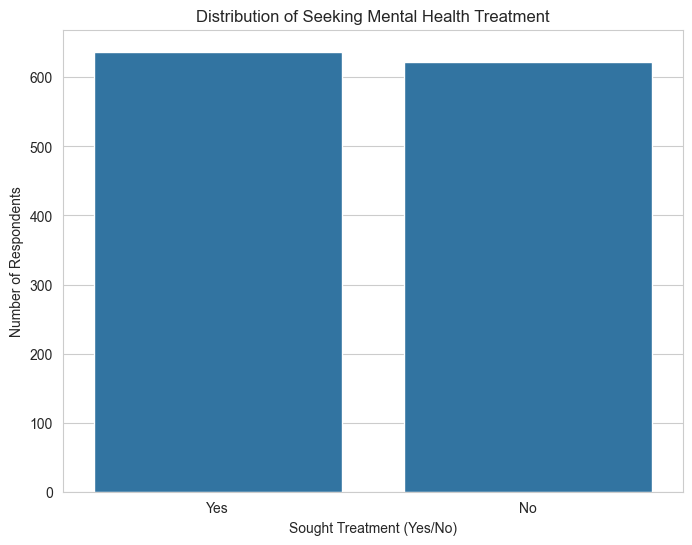

treatment
Yes    0.505957
No     0.494043
Name: proportion, dtype: float64


In [12]:
# Analyze the Target Variable

# Visualize the distribution of the target variable 'treatment'
plt.figure(figsize=(8, 6))
sns.countplot(x='treatment', data=df)
plt.title('Distribution of Seeking Mental Health Treatment')
plt.xlabel('Sought Treatment (Yes/No)')
plt.ylabel('Number of Respondents')
plt.show()

# You can also print the exact numbers
print(df['treatment'].value_counts(normalize=True))

In [13]:
# Analyzing Respondents by Country
# Get the count of respondents from each country
country_counts = df['Country'].value_counts()
print("Number of respondents from the top 10 countries:")
print(country_counts.head(10))

Number of respondents from the top 10 countries:
Country
United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Name: count, dtype: int64


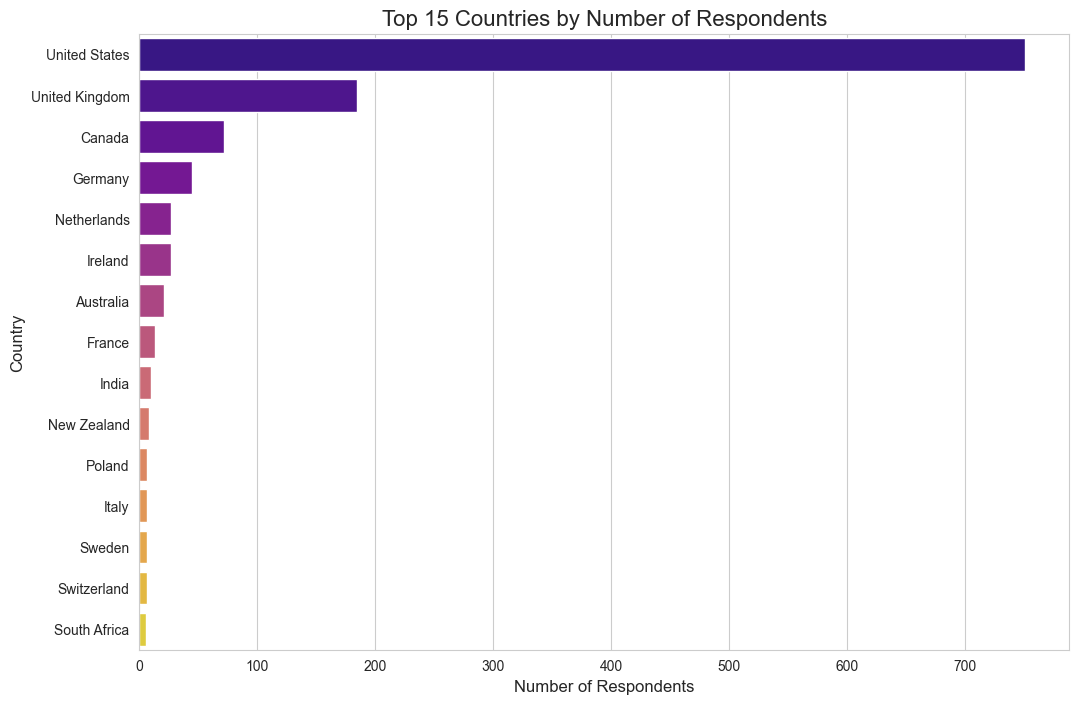

In [16]:
# Visualize the distribution of the top 15 countries
plt.figure(figsize=(12, 8))
# We use .nlargest(15) to get the top 15 countries for a cleaner plot
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().nlargest(15).index, palette='plasma')
plt.title('Top 15 Countries by Number of Respondents', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()


In [18]:
# Inspect the unique values in the 'Gender' column
print(df['Gender'].unique())


['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [19]:
# Standardize the 'Gender' column
# Grouping various male-identifying terms
male_terms = ['Male', 'male', 'M', 'm', 'Make', 'Cis Male', 'Man', 'msle', 'Mail', 'Mal', 'Cis Man', 'Male-ish', 'maile', 'Malr']
# Grouping various female-identifying terms
female_terms = ['Female', 'female', 'F', 'f', 'Woman', 'Cis Female', 'Femake', 'woman', 'Female ', 'cis-female/femme', 'femail']

# Apply the cleaning logic
df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x in male_terms else ('Female' if x in female_terms else 'Other'))

print("\nCleaned gender categories:")
print(df['Gender'].value_counts())


Cleaned gender categories:
Gender
Male      986
Female    246
Other      27
Name: count, dtype: int64


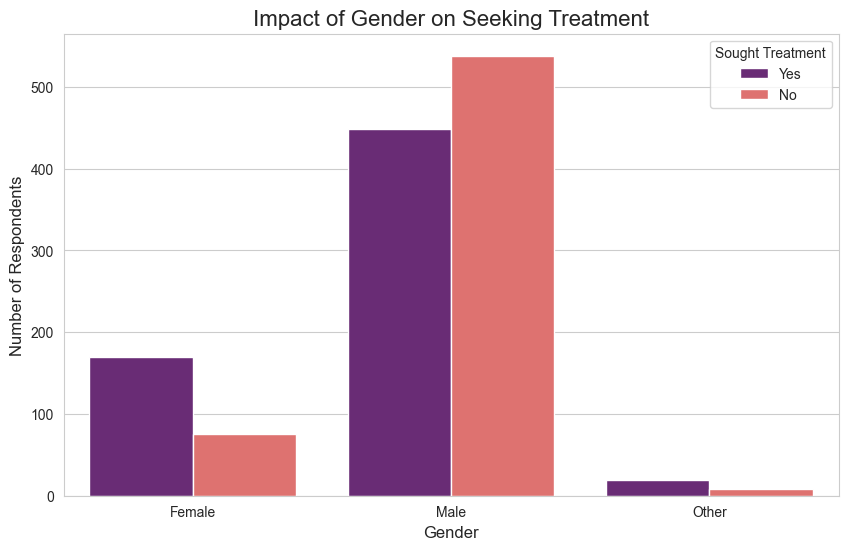

In [20]:
# Visualize the relationship between Gender and Treatment
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='treatment', data=df, palette='magma')
plt.title('Impact of Gender on Seeking Treatment', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.legend(title='Sought Treatment')
plt.show()

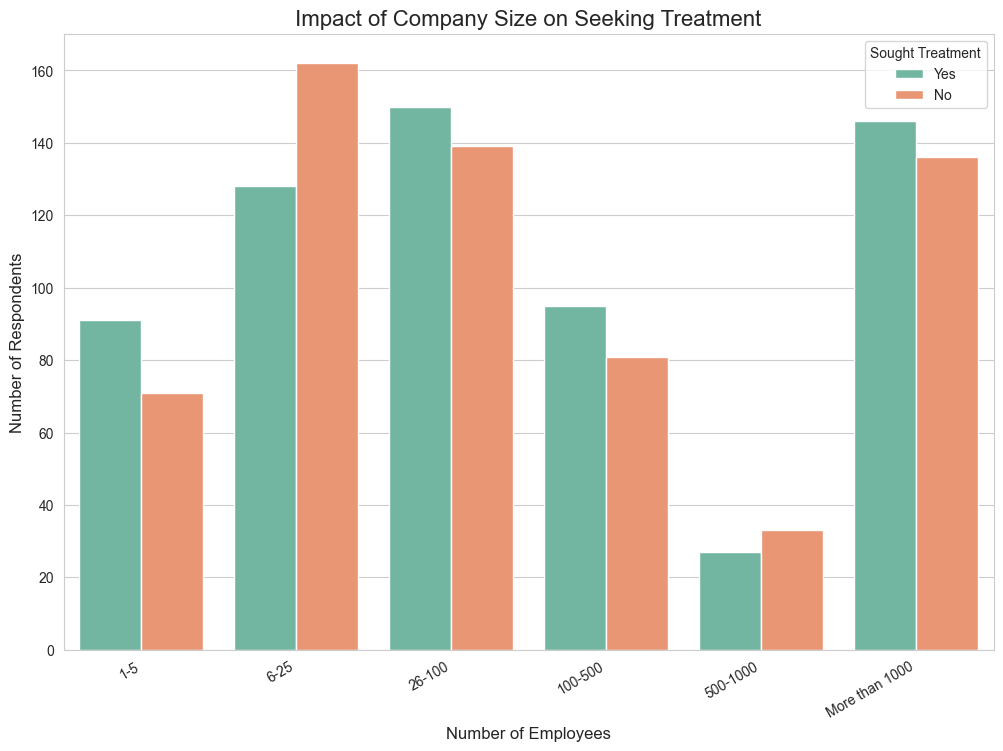

In [21]:
# Analyze Workplace Factors

# Visualize the relationship between Company Size and Treatment
plt.figure(figsize=(12, 8))
sns.countplot(x='no_employees', hue='treatment', data=df, palette='Set2', 
              order=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'])
plt.title('Impact of Company Size on Seeking Treatment', fontsize=16)
plt.xlabel('Number of Employees', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=30, ha='right') # Rotate labels for better readability
plt.legend(title='Sought Treatment')
plt.show()

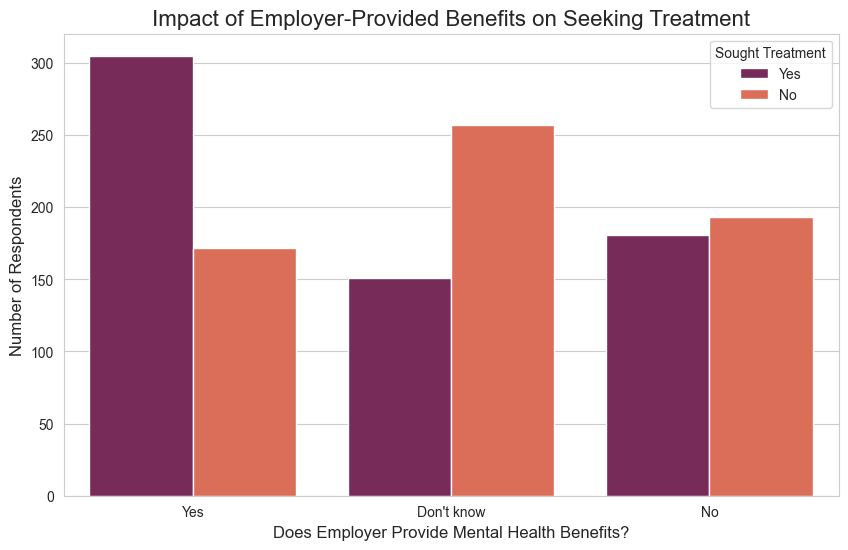

In [22]:
# Analyze Workplace Benefits

# Visualize the relationship between Benefits and Treatment
plt.figure(figsize=(10, 6))
sns.countplot(x='benefits', hue='treatment', data=df, palette='rocket')
plt.title('Impact of Employer-Provided Benefits on Seeking Treatment', fontsize=16)
plt.xlabel('Does Employer Provide Mental Health Benefits?', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.legend(title='Sought Treatment')
plt.show()

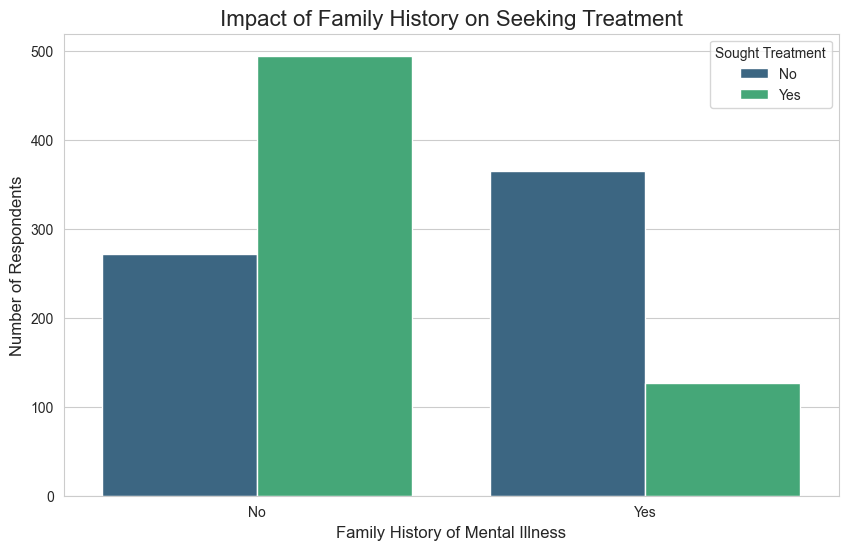

In [23]:
# Analyzing Family History vs. Treatment

# Visualize the relationship between Family History and Treatment
plt.figure(figsize=(10, 6))
sns.countplot(x='family_history', hue='treatment', data=df, palette='viridis')
plt.title('Impact of Family History on Seeking Treatment', fontsize=16)
plt.xlabel('Family History of Mental Illness', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Manually set the labels for clarity after encoding
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Sought Treatment', labels=['No', 'Yes'])
plt.show()

In [24]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


## EDA Task Summaries

+ **Initial Inspection & Setup**
  We began by loading the data and performing an initial inspection, which revealed corrupted Age data and numerous missing values. This step established a clear "hit list" for our data cleaning process.

+ **Data Cleaning**
  We systematically cleaned the dataset by correcting invalid Age entries with median replacement and standardizing messy Gender values. We also imputed missing data and dropped non-essential columns to prepare for analysis.

+ **Target Variable Analysis**
  We analyzed our target variable, treatment, and found it to be almost perfectly balanced. This is an ideal scenario for building an unbiased classification model.

+ **Country Distribution**
  Our analysis showed the data is heavily skewed, with nearly 60% of respondents from the United States. This means our model's insights will be most applicable to the US tech industry.

+ **Gender vs. Treatment Analysis**
  We found a strong relationship between gender and seeking treatment. Female respondents were significantly more likely to have sought treatment than their male counterparts, making it a key predictive feature.

+ **Company Size vs. Treatment Analysis**
  Investigating company size revealed a complex, non-linear relationship with treatment-seeking behavior. Employees in mid-to-large companies were generally more likely to have sought help than those in small companies (6-25 employees).

+ **Benefits vs. Treatment Analysis**
  We found that an employee's awareness of their benefits is a powerful predictor. Those who knew they had benefits were far more likely to seek treatment, while uncertainty was a major deterrent.

+ **Family History vs. Treatment Analysis**
  This analysis confirmed that having a family history of mental illness is a massive predictor. Individuals with a family history were overwhelmingly more likely to have sought treatment.

In [25]:
# In your 01_EDA_and_Cleaning.ipynb
# This saves the cleaned dataframe to the processed data folder
df.to_csv('../data/processed/cleaned_survey.csv', index=False)
print("Cleaned data saved successfully!")

Cleaned data saved successfully!
